In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from typing import Optional, List, Callable, Any, Union, Dict
from itertools import product
from statistics import mean
from pathlib import Path
import gzip
import os
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from typing import Optional, List, Callable, Any, Union, Dict
from itertools import product
from statistics import mean
from pathlib import Path
import gzip
import os

### Load and preprocess data

In [100]:
data = pd.read_csv('./data/features_train_final.csv')
#data = pd.read_csv('./data/features_filtered.csv')
data.head()


,battleneturl,ratio_s,ratio_base,ratio_mineral,action_per_5_seconds,ratio_x0,ratio_x1,ratio_x2,Base,SingleMineral,...,hotkey80_f5,hotkey82_f5,hotkey90_f5,hotkey92_f5,s_f5,Base_f5,SingleMineral_f5,played_race_Protoss,played_race_Terran,played_race_Zerg
0,53,0.063965,0.006264,0.000475,6.990596,0.082717,0.000000,0.917283,0.039879,0.003021,...,0.0,0.0,0.0,0.0,5.0,1.0,0.0,True,False,False
1,29,0.051058,0.001139,0.000000,6.384615,0.061559,0.001965,0.936477,0.007251,0.000000,...,0.0,0.0,0.0,0.0,6.0,3.0,0.0,True,False,False
2,53,0.040809,0.004460,0.000285,6.867347,0.049539,0.000000,0.950461,0.046535,0.002970,...,0.0,0.0,0.0,0.0,4.0,2.0,0.0,True,False,False
3,29,0.037677,0.001993,0.000000,6.861386,0.059794,0.001031,0.939175,0.020896,0.000000,...,0.0,0.0,0.0,0.0,5.0,2.0,0.0,True,False,False
4,53,0.019740,0.000190,0.000000,5.820755,0.051345,0.000000,0.948655,0.003704,0.000000,...,0.0,0.0,0.0,0.0,4.0,2.0,0.0,True,False,False


In [101]:
# Check missing values before cleaning
missing_before = data.isna().sum().sum()
print(f"Missing values: {missing_before}")

Missing values: 240


In [126]:
#filter dataframe by non important features

#len(importance_df)
#filtered_df = pd.concat([data[importance_df['Feature'].head(25)], data['battleneturl']], axis=1)
#data = filtered_df

In [102]:
# Split the data into training and testing sets
X = data.drop(['battleneturl'], axis=1)
#X = data.drop(['battleneturl', 'played_race_Protoss', 'played_race_Terran', 'played_race_Zerg'], axis=1)
y = data['battleneturl']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
X_train

,ratio_s,ratio_base,ratio_mineral,action_per_5_seconds,ratio_x0,ratio_x1,ratio_x2,Base,SingleMineral,hotkey00,...,hotkey80_f5,hotkey82_f5,hotkey90_f5,hotkey92_f5,s_f5,Base_f5,SingleMineral_f5,played_race_Protoss,played_race_Terran,played_race_Zerg
781,0.030179,0.000664,0.000000,7.106061,0.037823,0.000923,0.961255,0.006897,0.000000,0.000000,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,True,False,False
2629,0.105058,0.000285,0.005694,9.103448,0.057604,0.000000,0.942396,0.001863,0.037267,0.000621,...,0.0,0.0,1.0,0.0,4.0,2.0,0.0,False,True,False
227,0.054854,0.000095,0.000095,9.628571,0.024931,0.004848,0.970222,0.000939,0.000939,0.000000,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,False,True,False
365,0.116352,0.001329,0.000000,11.010949,0.023609,0.034289,0.942102,0.010256,0.000000,0.000000,...,0.0,0.0,0.0,0.0,6.0,1.0,0.0,False,False,True
2404,0.119484,0.007118,0.000095,10.798319,0.076799,0.000000,0.923201,0.062762,0.000837,0.000000,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.089589,0.000000,0.001424,9.551282,0.081068,0.000494,0.918438,0.000000,0.009585,0.002556,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,False,True,False
1095,0.108095,0.004840,0.000190,10.379592,0.040650,0.016999,0.942350,0.041633,0.001633,0.000000,...,0.0,0.0,0.0,0.0,7.0,0.0,0.0,False,False,True
1130,0.035494,0.000380,0.000000,15.341463,0.040371,0.013898,0.945731,0.006504,0.000000,0.000000,...,0.0,0.0,1.0,0.0,3.0,2.0,0.0,False,False,True
1294,0.087406,0.000000,0.012907,12.275472,0.033212,0.000000,0.966788,0.000000,0.101873,0.000749,...,0.0,0.0,0.0,0.0,5.0,1.0,0.0,False,True,False


In [104]:
# Ensure all column names in X_train are strings
X_train.columns = X_train.columns.astype(str)

# Repeat the same for X_test if applicable
X_test.columns = X_test.columns.astype(str)

### Train the model

In [105]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from scipy.stats import randint, uniform


# Updated parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),  
    'max_depth': [None, 10, 15, 20], 
    'min_samples_split': randint(2, 20),  
    'min_samples_leaf': [2, 5, 10, 20],  
    'max_features': ['sqrt', 'log2'],  
}


rf = RandomForestClassifier(random_state=42)

#for better results we have imbalanced data so we will use stratified kfold
from sklearn.model_selection import StratifiedKFold

stratified_kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=50,  # Reduce the number of iterations to save memory
    cv=stratified_kfold,
    scoring='accuracy',
    n_jobs=1,
    verbose=2,
    random_state=42,
    error_score='raise',
)

In [106]:
# Fit on training data
random_search.fit(X_train, y_train)

# Print best parameters
print("Best Hyperparameters:", random_search.best_params_)

# Use the best model
best_rf = random_search.best_estimator_

Fitting 2 folds for each of 50 candidates, totalling 100 fits


/Users/sofialtman/ML/OT02---Data-Mining/.venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=16, n_estimators=156; total time=   0.9s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=16, n_estimators=156; total time=   0.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=171; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=171; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=12, n_estimators=137; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=12, n_estimators=137; total time=   0.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=20, min_samples_split=4, n_estimators=199; total time=   0.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=20, min_samples_split=4, n_estimators=199; total time=   0.7s
[CV] END max_depth=None, max

In [107]:
best_params = random_search.best_params_

# Train the final model with best parameters
rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=1,
    random_state=42
)

# Train the model on the full training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=138, random_state=42)

In [108]:
# Make predictions
y_pred = rf_model.predict(X_test)

### Evaluate

In [109]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")

Accuracy: 0.89
F1-Score: 0.87


### Feature importance

In [110]:
# Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

Feature Importances:
                 Feature  Importance
23              hotkey42    0.045241
26              hotkey52    0.043310
20              hotkey32    0.041378
3   action_per_5_seconds    0.039218
29              hotkey62    0.038539
..                   ...         ...
41           hotkey02_f5    0.000090
43           hotkey11_f5    0.000087
49           hotkey31_f5    0.000071
64           hotkey82_f5    0.000022
62           hotkey72_f5    0.000018

[73 rows x 2 columns]


In [111]:
import matplotlib.pyplot as plt

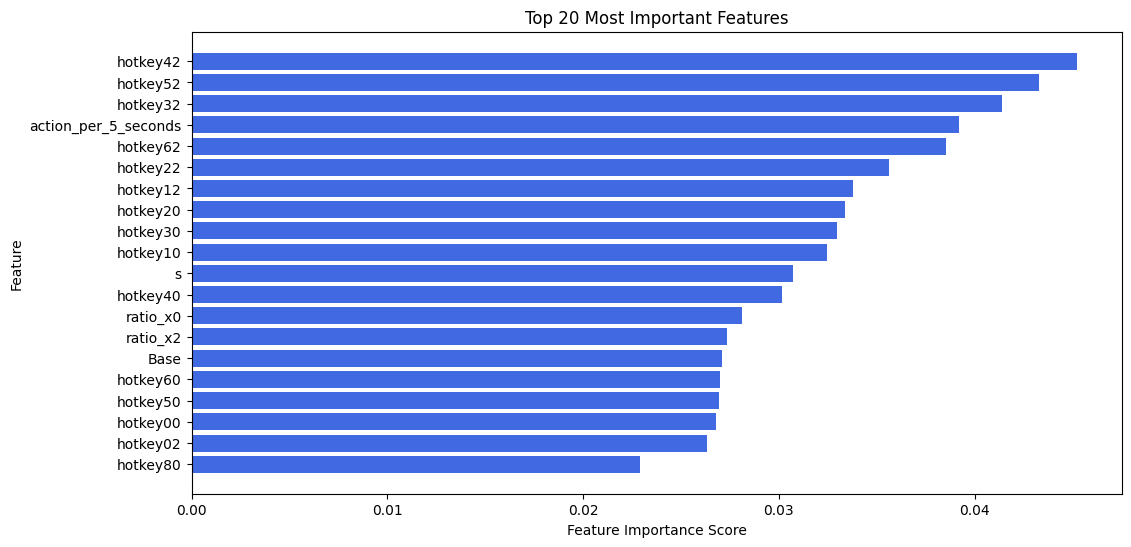

In [119]:
plt.figure(figsize=(12,6))
plt.barh(importance_df['Feature'][:20], importance_df['Importance'][:20], color='royalblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Top 20 Most Important Features")
plt.gca().invert_yaxis()  # Flip to show most important features on top
#plt.show()

### Predict on test set

In [113]:
#load the calculated features on the test set
features_test = pd.read_csv('data/features_test_final.csv')
features_test.head(5)

,ratio_s,ratio_base,ratio_mineral,action_per_5_seconds,ratio_x0,ratio_x1,ratio_x2,Base,SingleMineral,hotkey00,...,hotkey80_f5,hotkey82_f5,hotkey90_f5,hotkey92_f5,s_f5,Base_f5,SingleMineral_f5,played_race_Protoss,played_race_Terran,played_race_Zerg
0,0.124395,0.002787,0.000440,18.674286,0.019583,0.013333,0.967083,0.021714,0.003429,0.016000,...,0,0,1,0,6,0,0,False,False,True
1,0.083908,0.000000,0.000000,11.301020,0.032219,0.000000,0.967781,0.000000,0.000000,0.002030,...,0,0,0,0,1,0,0,False,True,False
2,0.081561,0.002934,0.000000,14.442149,0.046217,0.000000,0.953783,0.016529,0.000000,0.000826,...,1,0,0,0,5,2,0,True,False,False
3,0.232947,0.002494,0.000293,10.458333,0.064677,0.069652,0.865672,0.011565,0.001361,0.000000,...,0,0,0,0,5,0,0,False,False,True
4,0.034619,0.003081,0.000000,4.206349,0.134545,0.025455,0.840000,0.031818,0.000000,0.004545,...,0,0,0,0,3,2,0,True,False,False


In [114]:
# Compare column names
train_columns = set(X_train.columns)  # Columns from the training data
test_columns = set(features_test.columns)    # Columns from the test data

if train_columns != test_columns:
    print("Mismatch in columns!")
    print("Missing in test:", train_columns - test_columns)
    print("Extra in test:", test_columns - train_columns)

In [115]:
missing_columns = train_columns - test_columns
# Add the missing columns and set their values to 0
for col in missing_columns:
    features_test[col] = 0

In [116]:
# Reorder the columns in 'df' to match the order in 'reference_df'
features_test = features_test[X_train.columns]

In [117]:
#assert the column headers are in str format
features_test.columns = features_test.columns.astype(str)
#run prediction on test set
y_pred = rf_model.predict(features_test)

## Creation of dataframe for submission

In [118]:

# Create DataFrame with RowId and predicted battleneturl
df = pd.DataFrame({
    'RowId': range(1,len(y_pred)+1),
    'prediction': y_pred
})

# Get current timestamp for unique file naming
#timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
csv_filename = f"predictions_fr_kaggle_test.csv"


df.to_csv(f'data/predictions/{csv_filename}', index=False)


## Final submit 
not with filtered features as we got better results without them (training on all features)

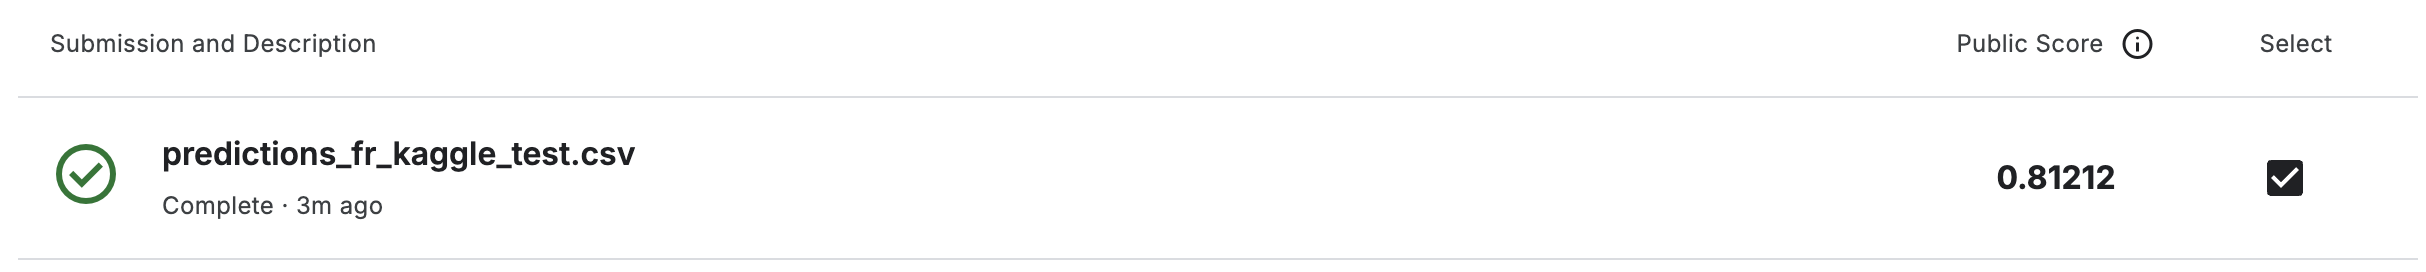